In [31]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Reading in the blocked grouped table

In [2]:
fbg = pd.read_csv("final_blocked_grouped.csv")
del fbg['Unnamed: 0']
fbg.head()

,rev_user_text,diff_week,rev_id,rev_minor_edit,rev_deleted,rev_len,days_active,rev_minor_edit_n,rev_deleted_n,ipb_address,keyword
0,!23455666A!wee,1,2,0,0,19934.50,1,0.0,0.0,!23455666A!wee,Multiple Accounts
1,!Cookiesarenice!,1,4,0,0,86042.75,1,0.0,0.0,!Cookiesarenice!,Vandalism
2,!D+lsamwks,1,2,2,0,18184.50,1,1.0,0.0,!D+lsamwks,No Intention to Contribute
3,!Ideas,1,1,0,0,13170.00,1,0.0,0.0,!Ideas,Multiple Accounts
4,"$1,000,000 and a headline show in Las Vegas",1,4,0,0,136833.50,1,0.0,0.0,"$1,000,000 and a headline show in Las Vegas",Sock Puppettry


Extracting days_active

In [3]:
da_1 = fbg.loc[:,['rev_user_text','days_active']]
da_1 = da_1.drop_duplicates()
da_1.head(20)

,rev_user_text,days_active
0,!23455666A!wee,1
1,!Cookiesarenice!,1
2,!D+lsamwks,1
3,!Ideas,1
4,"$1,000,000 and a headline show in Las Vegas",1
5,$JOHN CENA$,1
6,$olutions4,1
7,$oo$t0r,4
9,$pringfield,1
10,$targlass,4


Removing ipb_address and keyword to add it later

In [11]:
#blk = fbg.loc[:,['ipb_address','keyword']]

In [15]:
#blk = blk.drop_duplicates()

In [30]:
#blk.head(20)

,ipb_address,keyword
0,!23455666A!wee,Multiple Accounts
1,!Cookiesarenice!,Vandalism
2,!D+lsamwks,No Intention to Contribute
3,!Ideas,Multiple Accounts
4,"$1,000,000 and a headline show in Las Vegas",Sock Puppettry
5,$JOHN CENA$,Username or Soft Block
6,$olutions4,Spam
7,$oo$t0r,Sock Puppettry
9,$pringfield,Multiple Accounts
10,$targlass,Sock Puppettry


In [31]:
#blk.to_csv('blocked_users.csv')

In [19]:
#del fbg['ipb_address']
#del fbg['keyword']
#fbg.head()

,rev_user_text,diff_week,rev_id,rev_minor_edit,rev_deleted,rev_len,days_active,rev_minor_edit_n,rev_deleted_n
0,!23455666A!wee,1,2,0,0,19934.50,1,0.0,0.0
1,!Cookiesarenice!,1,4,0,0,86042.75,1,0.0,0.0
2,!D+lsamwks,1,2,2,0,18184.50,1,1.0,0.0
3,!Ideas,1,1,0,0,13170.00,1,0.0,0.0
4,"$1,000,000 and a headline show in Las Vegas",1,4,0,0,136833.50,1,0.0,0.0


Reading in the non-blocked grouped table

In [4]:
fnbg = pd.read_csv("final_nonblocked_grouped.csv")
del fnbg['Unnamed: 0']
fnbg.head()

,rev_user_text,diff_week,rev_id,rev_minor_edit,rev_deleted,rev_len,days_active,rev_minor_edit_n,rev_deleted_n
0,"onmouseover=alert('xss')"" """,1,1,0,0,15.0,1,0.0,0.0
1,! Bikkit !,1,1,0,0,3756.0,2,0.0,0.0
2,!!Ethereal!!,1,1,0,0,102062.0,2,0.0,0.0
3,!!Ethereal!!,2,1,0,0,103971.0,2,0.0,0.0
4,!!Hûm Såfår!!,1,2,0,0,6726.5,1,0.0,0.0


In [5]:
da_2 = fnbg.loc[:,['rev_user_text','days_active']]
da_2 = da_2.drop_duplicates()
da_2.head(20)

,rev_user_text,days_active
0,"onmouseover=alert('xss')"" """,1
1,! Bikkit !,2
2,!!Ethereal!!,2
4,!!Hûm Såfår!!,1
5,!0Clarke,2
6,!0MinutesADay,3
8,!6cam6!,1
9,!7everton,1
10,!Historiantosaratoga,1
11,!MNc99,1


Adding da_1 and da_2

In [6]:
da_frames = [da_1,da_2]
da_all = pd.concat(da_frames)

In [7]:
da_all.to_csv('days_active.csv')

## Checking overlap with Textual data

In [ ]:
b_list = fbg['rev_user_text']
nb_list = fnbg['rev_user_text']

In [ ]:
type(b_list)

#### Removing Duplicates

In [ ]:
b_list_u = b_list.unique()

In [ ]:
nb_list_u = nb_list.unique()

In [ ]:
b_list_u

In [ ]:
type(b_list_u)

In [ ]:
nb_list_u

#### Converting back to series

In [ ]:
#my_list = map(lambda x: x[0], b_list_u)
b_ser = pd.Series(b_list_u)
b_ser

In [ ]:
#my_list = map(lambda x: x[0], nb_list_u)
nb_ser = pd.Series(nb_list_u)
nb_ser

In [ ]:
df_blockuserlist = pd.read_csv( 'blockuserlist.txt', sep = '\t')

In [ ]:
df_blockuserlist

In [ ]:
blist = b_ser.to_frame(name='0')

In [ ]:
blist

In [ ]:
rev_all = pd.merge(blist,df_blockuserlist,how="inner",on=["0"])

In [ ]:
rev_all

## Pivoting the grouped tables for feature extraction

#### (A) Pivotting the non blocked grouped table

In [4]:
p1 = fnbg.pivot(index='rev_user_text', columns='diff_week')

In [5]:
p1.head(50)

rev_id                                 \
diff_week                         1    2    3   4   5   6   7    8   
rev_user_text                                                        
 onmouseover=alert('xss')" "    1.0  NaN  NaN NaN NaN NaN NaN  NaN   
! Bikkit !                      1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!!Ethereal!!                    1.0  1.0  NaN NaN NaN NaN NaN  NaN   
!!Hûm Såfår!!                   2.0  NaN  NaN NaN NaN NaN NaN  NaN   
!0Clarke                        3.0  NaN  NaN NaN NaN NaN NaN  NaN   
!0MinutesADay                   9.0  NaN  2.0 NaN NaN NaN NaN  NaN   
!6cam6!                         1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!7everton                       2.0  NaN  NaN NaN NaN NaN NaN  NaN   
!Historiantosaratoga            1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!MNc99                          1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!Makedamsoncreeks123            1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!NewLondon31                    1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!Puce456                        1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!Silent                         1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!Swapnil!                       1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!WEDFGBNMJUY&*                  1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!autioitua!                     1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!dea4u                         24.0  NaN  NaN NaN NaN NaN NaN  NaN   
!hellao!                       30.0  NaN  NaN NaN NaN NaN NaN  NaN   
!heythere1234!                  1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!john!12                        3.0  NaN  NaN NaN NaN NaN NaN  NaN   
!kallio!                        1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!kjjk1992jk!                    2.0  NaN  NaN NaN NaN NaN NaN  NaN   
!mmi.Y                          2.0  NaN  NaN NaN NaN NaN NaN  NaN   
!nnovativ                       2.0  NaN  NaN NaN NaN NaN NaN  NaN   
!qwerty67                       1.0  NaN  NaN NaN NaN NaN NaN  NaN   
!rehtom                         3.0  4.0  1.0 NaN NaN NaN NaN  NaN   
$$ kitty baby $&                1.0  NaN  1.0 NaN NaN NaN NaN  NaN   
$$ kitty boo $$                 1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$ tariq                        1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$$$R.J.Amit&&                  1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$TARICE$$                      2.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$ZooDog$$                      1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$avage Cabbage                 1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$$sha boo$$                     6.0  NaN  NaN NaN NaN NaN NaN  NaN   
$&$ films (S&S films)           1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$--AtlernsaywoAccounts          1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$.M.Rifat                       2.0  NaN  NaN NaN NaN NaN NaN  NaN   
$200inaire                      2.0  NaN  NaN NaN NaN NaN NaN  NaN   
$2ub65P9740h                    1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$3EFTPOS                        7.0  NaN  NaN NaN NaN NaN NaN  NaN   
$AGMA$                          1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$ARCASTIC                       1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$AVAG3222                       1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$Cash$                          5.0  NaN  NaN NaN NaN NaN NaN  NaN   
$Cpsingh$                       1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$Divij                          1.0  NaN  NaN NaN NaN NaN NaN  NaN   
$Harsh$                         3.0  NaN  NaN NaN NaN NaN NaN  NaN   
$Jimmy$                         1.0  NaN  NaN NaN NaN NaN NaN  5.0   
$Jp?hMA467%x;aks2              10.0  NaN  NaN NaN NaN NaN NaN  NaN   

                             rev_minor_edit      ...  rev_minor_edit_n       \
diff_week                                 1    2 ...                 7    8   
rev_user_text                                    ...                          
 onmouseover=alert('xss')" "            0.0  NaN ...               NaN  NaN   
! 

Resetting the multiple column levels to individual column for each week

In [6]:
p1.columns = ['rev_id_1','rev_id_2','rev_id_3','rev_id_4','rev_id_5','rev_id_6','rev_id_7','rev_id_8',
              'rev_minor_edit_1','rev_minor_edit_2','rev_minor_edit_3','rev_minor_edit_4','rev_minor_edit_5',
              'rev_minor_edit_6','rev_minor_edit_7','rev_minor_edit_8',
              'rev_deleted_1','rev_deleted_2','rev_deleted_3','rev_deleted_4','rev_deleted_5','rev_deleted_6',
              'rev_deleted_7','rev_deleted_8',
              'rev_len_1','rev_len_2','rev_len_3','rev_len_4','rev_len_5','rev_len_6','rev_len_7','rev_len_8',
              'days_active_1','days_active_2','days_active_3','days_active_4','days_active_5','days_active_6',
              'days_active_7','days_active_8',
              'rev_minor_edit_n_1','rev_minor_edit_n_2','rev_minor_edit_n_3','rev_minor_edit_n_4','rev_minor_edit_n_5',
              'rev_minor_edit_n_6','rev_minor_edit_n_7','rev_minor_edit_n_8',
              'rev_deleted_n_1','rev_deleted_n_2','rev_deleted_n_3','rev_deleted_n_4','rev_deleted_n_5',
              'rev_deleted_n_6','rev_deleted_n_7','rev_deleted_n_8']

In [7]:
p1.head(50)

,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,rev_minor_edit_2,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
rev_user_text,,,,,,,,,,,,,,,,,,,,,
"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!0MinutesADay,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
!6cam6!,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!7everton,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Historiantosaratoga,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reseting the index and reverting rev_user_text to a column

In [8]:
p1.reset_index(inplace=True)

In [9]:
p1.head(50)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,!0MinutesADay,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,!6cam6!,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,!7everton,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,!Historiantosaratoga,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,!MNc99,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deleting days active columns except one(not needed for each week)

In [10]:
del p1['days_active_2']
del p1['days_active_3']
del p1['days_active_4']
del p1['days_active_5']
del p1['days_active_6']
del p1['days_active_7']
del p1['days_active_8']
p1 = p1.rename(index=str,columns={"days_active_1":"days_active"})
p1.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
p1['days_active'].head()

0    1.0
1    2.0
2    2.0
3    1.0
4    2.0
Name: days_active, dtype: float64

In [28]:
p1['blocked'] = 0
p1.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [29]:
p1.to_csv('Nonblocked_grouped_pivoted.csv')

#### (B) Pivotting the blocked grouped table

In [21]:
p2 = fbg.pivot(index='rev_user_text', columns='diff_week')
p2.head(50)

rev_id                   \
diff_week                                               1    2     3     4   
rev_user_text                                                                
!23455666A!wee                                        2.0  NaN   NaN   NaN   
!Cookiesarenice!                                      4.0  NaN   NaN   NaN   
!D+lsamwks                                            2.0  NaN   NaN   NaN   
!Ideas                                                1.0  NaN   NaN   NaN   
$1,000,000 and a headline show in Las Vegas           4.0  NaN   NaN   NaN   
$JOHN CENA$                                           1.0  NaN   NaN   NaN   
$olutions4                                            NaN  NaN   NaN  17.0   
$oo$t0r                                               NaN  NaN  17.0  10.0   
$pringfield                                           1.0  NaN   NaN   NaN   
$targlass                                            15.0  NaN   NaN   NaN   
$ummerki$$                                            NaN  4.0   1.0   NaN   
&ndash&ndash                                          NaN  NaN   1.0   NaN   
'Ardkawpawn                                           7.0  NaN   NaN   NaN   
'lllllllllllllllllllllllllllllll'                    12.0  NaN   NaN   NaN   
'trolling'                                            3.0  NaN   NaN   NaN   
($)()nfmeme                                           2.0  NaN   NaN   NaN   
(. Y .)Anonymous(. Y .)                               1.0  NaN   NaN   NaN   
(127.0.0.1)                                          14.0  2.0   NaN   2.0   
(35)moo                                               5.0  4.0   NaN   NaN   
(GM) Navin Electrical                                 1.0  NaN   NaN   NaN   
(TIB1017DTIB1018B)                                    5.0  NaN   NaN   NaN   
(TIB1024H) (Volgren)                                  4.0  NaN   NaN   NaN   
(TIB1034D)                                            2.0  NaN   NaN   NaN   
(TIB1035BTIB1036ZTIB1037X TIB1039RTIB1040K)           2.0  NaN   NaN   NaN   
(TIB1041HTIB1042ETIB1043CTIB1044ATIB1045YTIB104...    2.0  NaN   NaN   NaN   
(TIB1105H)                                            1.0  NaN   NaN   NaN   
(TIB1178YTIB1179UTIB1180PTIB1181LTIB1182JTIB118...    1.0  NaN   NaN   NaN   
(TIB1198PTIB1199LTIB1200RTIB1201MTIB1202KTIB120...    1.0  NaN   NaN   NaN   
(TIB1214B)                                            4.0  NaN   NaN   NaN   
(TIB392BTIB393ZTIB394XTIB395TTIB396RTIB397MTIB3...    1.0  NaN   NaN   NaN   
(TIB403DTIB404BTIB405ZTIB406XTIB407TTIB408RTIB4...    1.0  NaN   NaN   NaN   
(TIB414YTIB415UTIB416STIB417PTIB418LTIB419JTIB4...    1.0  NaN   NaN   NaN   
(TIB425RTIB426MTIB427KTIB428HTIB429ETIB430ATIB4...    1.0  NaN   NaN   NaN   
(TIB436JTIB437GTIB438DTIB439BTIB440XTIB441TTIB4...    1.0  NaN   NaN   NaN   
(TIB513UTIB514STIB515PTIB516LTIB517JTIB518GTIB5...    1.0  NaN   NaN   NaN   
(TIB524MTIB525KTIB526HTIB527ETIB528CTIB529ATIB5...    1.0  NaN   NaN   NaN   
(TIB535GTIB536DTIB537BTIB538ZTIB539XTIB540RTIB5...    1.0  NaN   NaN   NaN   
(TIB546ATIB547YTIB548UTIB549STIB550LTIB551JTIB5...    1.0  NaN   NaN   NaN   
(TIB562CTIB563ATIB564YTIB565UTIB566STIB567PTIB5...    NaN  2.0   NaN   NaN   
(TIB626CTIB627ATIB628YTIB629UTIB630PTIB631LTIB6...    2.0  NaN   NaN   NaN   
(TIB828LTIB829JTIB830DTIB831BTIB832Z)                 2.0  NaN   NaN   NaN   
(TIB844PTIB845LTIB846JTIB847GTIB848D)                 2.0  NaN   NaN   NaN   
(TIB963DTIB964BTIB965ZTIB966XTIB967TTIB968RTIB9...    2.0  NaN   NaN   NaN   
(TIB973ATIB974YTIB975UTIB976S)                        1.0  NaN   NaN   NaN   
(TIB977PTIB978LTIB979JTIB980DTIB981BTIB982ZTIB9...    2.0  NaN   NaN   NaN   
(TIB987KTIB988HTIB989ETIB990ATIB991YTIB992UTIB9...    4.0  NaN   NaN   NaN   
(TIB994PTIB995LTIB996JTIB997GTIB998DTIB999BTIB1...    3.0  NaN   NaN   NaN   
(TPD ACB EMD)                                         4.0  NaN   NaN   NaN   
(TSB-123456789012345678901234567890123456789012...    1.0  NaN   NaN   Na

Resetting the multiple level columns to weekly columns

In [22]:
p2.columns = ['rev_id_1','rev_id_2','rev_id_3','rev_id_4','rev_id_5','rev_id_6','rev_id_7','rev_id_8',
              'rev_minor_edit_1','rev_minor_edit_2','rev_minor_edit_3','rev_minor_edit_4','rev_minor_edit_5',
              'rev_minor_edit_6','rev_minor_edit_7','rev_minor_edit_8',
              'rev_deleted_1','rev_deleted_2','rev_deleted_3','rev_deleted_4','rev_deleted_5','rev_deleted_6',
              'rev_deleted_7','rev_deleted_8',
              'rev_len_1','rev_len_2','rev_len_3','rev_len_4','rev_len_5','rev_len_6','rev_len_7','rev_len_8',
              'days_active_1','days_active_2','days_active_3','days_active_4','days_active_5','days_active_6',
              'days_active_7','days_active_8',
              'rev_minor_edit_n_1','rev_minor_edit_n_2','rev_minor_edit_n_3','rev_minor_edit_n_4','rev_minor_edit_n_5',
              'rev_minor_edit_n_6','rev_minor_edit_n_7','rev_minor_edit_n_8',
              'rev_deleted_n_1','rev_deleted_n_2','rev_deleted_n_3','rev_deleted_n_4','rev_deleted_n_5',
              'rev_deleted_n_6','rev_deleted_n_7','rev_deleted_n_8']
p2.head(50)

,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,rev_minor_edit_2,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
rev_user_text,,,,,,,,,,,,,,,,,,,,,
!23455666A!wee,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Cookiesarenice!,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!D+lsamwks,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Ideas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$1,000,000 and a headline show in Las Vegas",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$JOHN CENA$,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$olutions4,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
$oo$t0r,NaN,NaN,17.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
$pringfield,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reverting the index to bring out rev_user_text as a column

In [23]:
p2.reset_index(inplace=True)
p2.head(50)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
0,!23455666A!wee,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!Cookiesarenice!,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!D+lsamwks,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!Ideas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$1,000,000 and a headline show in Las Vegas",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,$JOHN CENA$,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$olutions4,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,$oo$t0r,NaN,NaN,17.0,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,$pringfield,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,$targlass,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deleting the days_active which are not needed

In [24]:
del p2['days_active_2']
del p2['days_active_3']
del p2['days_active_4']
del p2['days_active_5']
del p2['days_active_6']
del p2['days_active_7']
del p2['days_active_8']
p2 = p2.rename(index=str,columns={"days_active_1":"days_active"})
p2.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8
0,!23455666A!wee,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!Cookiesarenice!,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,!D+lsamwks,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,!Ideas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"$1,000,000 and a headline show in Las Vegas",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
p2['blocked'] = 1
p2.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked
0,!23455666A!wee,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,!Cookiesarenice!,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,!D+lsamwks,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,!Ideas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"$1,000,000 and a headline show in Las Vegas",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [26]:
p2.to_csv('Blocked_grouped_pivoted.csv')

## Concatenating the blocked and non blocked pivot data

In [2]:
p1 = pd.read_csv("Nonblocked_grouped_pivoted.csv")
del p1['Unnamed: 0']
p1.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
p2 = pd.read_csv("Blocked_grouped_pivoted.csv")
del p2['Unnamed: 0']
p2.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked
0,!23455666A!wee,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,!Cookiesarenice!,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,!D+lsamwks,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,!Ideas,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,"$1,000,000 and a headline show in Las Vegas",4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
da_all = pd.read_csv("days_active.csv")
del da_all['Unnamed: 0']
da_all.head()

,rev_user_text,days_active
0,!23455666A!wee,1
1,!Cookiesarenice!,1
2,!D+lsamwks,1
3,!Ideas,1
4,"$1,000,000 and a headline show in Las Vegas",1


In [7]:
#blk = pd.read_csv("blocked_users.csv")
#del blk['Unnamed: 0']
#blk.head()

,ipb_address,keyword
0,!23455666A!wee,Multiple Accounts
1,!Cookiesarenice!,Vandalism
2,!D+lsamwks,No Intention to Contribute
3,!Ideas,Multiple Accounts
4,"$1,000,000 and a headline show in Las Vegas",Sock Puppettry


In [5]:
frames = [p1,p2]
p_all = pd.concat(frames)

In [6]:
del p_all['days_active']
p_all = pd.merge(p_all,da_all,how="left",left_on=["rev_user_text"],right_on=["rev_user_text"])
p_all.head(10)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
5,!0MinutesADay,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,3.0
6,!6cam6!,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
7,!7everton,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
8,!Historiantosaratoga,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
9,!MNc99,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0


In [8]:
#p_all = pd.merge(p_all,blk,how="left",left_on=["rev_user_text"],right_on=["ipb_address"])
#p_all.head(10)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,ipb_address,keyword
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,!0MinutesADay,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
6,!6cam6!,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
7,!7everton,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8,!Historiantosaratoga,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
9,!MNc99,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [10]:
#p_all.tail(10)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,ipb_address,keyword
6224473,이혼,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,이혼,Vandalism
6224474,제이티비씨 뉴스특보,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,제이티비씨 뉴스특보,Vandalism
6224475,징플,163.0,35.0,15.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,징플,Vandalism
6224476,천우희,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,천우희,Vandalism
6224477,케이비에스 뉴스특보,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,케이비에스 뉴스특보,Vandalism
6224478,판데이,14.0,NaN,5.0,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1,판데이,Sock Puppettry
6224479,하지만 이런 상황에서 벌어진,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,하지만 이런 상황에서 벌어진,Vandalism
6224480,호반건설,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,호반건설,Vandalism
6224481,ﺟْﻮ ﻗُﻮَع ژٌ,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ﺟْﻮ ﻗُﻮَع ژٌ,Multiple Accounts
6224482,Ｍｏｏｒ ｆｏｒ Ｓｅｎａｔｅ ｃａｍｐａｉｇｎ,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Ｍｏｏｒ ｆｏｒ Ｓｅｎａｔｅ ｃａｍｐａｉｇｎ,Username or Soft Block


In [11]:
#del p_all['ipb_address']
#p_all.sample(10)

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,keyword
5512387,Lidaying1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1778807,223.104.38.223,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
817300,154.5.223.145,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5012898,Blueju212,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2470145,2601:441:280:301E:D0E:3ACF:F191:B2C6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3600091,50.29.103.220,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4384846,84.11.146.66,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5148891,Digitaluniverse29387,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6042260,Ventillator,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5719612,Paulwshih,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [12]:
#p_all['blocked'].value_counts()

0    6126509
1      97974
Name: blocked, dtype: int64

In [13]:
#p_all['keyword'].value_counts()

Vandalism                     28637
Multiple Accounts             12606
Sock Puppettry                11624
Spam                          11363
School Block                   9484
Username or Soft Block         6634
No Intention to Contribute     5458
Others                         3934
Disruptive                     1651
Evasion                        1591
Anonymous Contribution         1254
Long-term Abuse                1135
IP or Hard Block               1109
Proxy                           369
Harassment                      330
Copyright                       268
Webhost                         211
Not Available                   188
Username Violation               94
Impersonation                    34
Name: keyword, dtype: int64

In [9]:
p_all.to_csv('all_users_pivoted_n.csv')

#### Reading in the all_users_pivoted_n

In [2]:
p_all = pd.read_csv("all_users_pivoted_n.csv")
del p_all['Unnamed: 0']
p_all.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
0,"onmouseover=alert('xss')"" """,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
1,! Bikkit !,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
2,!!Ethereal!!,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0
3,!!Hûm Såfår!!,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
4,!0Clarke,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0


In [3]:
p_all.isna().sum()

rev_user_text               0
rev_id_1                 7532
rev_id_2              6026905
rev_id_3              6074505
rev_id_4              6096608
rev_id_5              6110748
rev_id_6              6121275
rev_id_7              6129313
rev_id_8              6134593
rev_minor_edit_1         7532
rev_minor_edit_2      6026905
rev_minor_edit_3      6074505
rev_minor_edit_4      6096608
rev_minor_edit_5      6110748
rev_minor_edit_6      6121275
rev_minor_edit_7      6129313
rev_minor_edit_8      6134593
rev_deleted_1            7532
rev_deleted_2         6026905
rev_deleted_3         6074505
rev_deleted_4         6096608
rev_deleted_5         6110748
rev_deleted_6         6121275
rev_deleted_7         6129313
rev_deleted_8         6134593
rev_len_1               24892
rev_len_2             6027414
rev_len_3             6074873
rev_len_4             6096868
rev_len_5             6110962
rev_len_6             6121462
rev_len_7             6129492
rev_len_8             6134750
rev_minor_

In [6]:
p_all[p_all['days_active'].isnull()]

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
6119691,deepuaa\t20170923043753\t0\t0\t8\r\r\r\n801975...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [4]:
p_all['days_active'].value_counts()

1.0      5072400
2.0       545398
3.0       192633
4.0       101901
5.0        62730
6.0        42805
7.0        30999
8.0        23341
9.0        17898
10.0       14551
11.0       11582
12.0        9714
13.0        8121
14.0        6794
15.0        5897
16.0        5132
17.0        4621
18.0        3820
19.0        3393
20.0        3008
21.0        2747
22.0        2460
23.0        2275
24.0        2131
25.0        1772
26.0        1697
27.0        1601
28.0        1479
29.0        1363
30.0        1255
          ...   
525.0          7
524.0          7
522.0          7
511.0          7
414.0          7
507.0          7
558.0          7
526.0          7
565.0          7
564.0          7
518.0          6
488.0          6
515.0          6
423.0          6
504.0          6
476.0          6
498.0          5
576.0          5
458.0          5
407.0          5
494.0          5
448.0          5
479.0          5
562.0          4
457.0          4
453.0          4
556.0          4
566.0         

## Building initial Classification Model

Filling missing NaN values with zero

In [9]:
p_all = p_all.fillna(0)
p_all.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
0,"onmouseover=alert('xss')"" """,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1,! Bikkit !,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0
2,!!Ethereal!!,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0
3,!!Hûm Såfår!!,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,!0Clarke,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0


In [10]:
p_all.isna().sum()

rev_user_text         0
rev_id_1              0
rev_id_2              0
rev_id_3              0
rev_id_4              0
rev_id_5              0
rev_id_6              0
rev_id_7              0
rev_id_8              0
rev_minor_edit_1      0
rev_minor_edit_2      0
rev_minor_edit_3      0
rev_minor_edit_4      0
rev_minor_edit_5      0
rev_minor_edit_6      0
rev_minor_edit_7      0
rev_minor_edit_8      0
rev_deleted_1         0
rev_deleted_2         0
rev_deleted_3         0
rev_deleted_4         0
rev_deleted_5         0
rev_deleted_6         0
rev_deleted_7         0
rev_deleted_8         0
rev_len_1             0
rev_len_2             0
rev_len_3             0
rev_len_4             0
rev_len_5             0
rev_len_6             0
rev_len_7             0
rev_len_8             0
rev_minor_edit_n_1    0
rev_minor_edit_n_2    0
rev_minor_edit_n_3    0
rev_minor_edit_n_4    0
rev_minor_edit_n_5    0
rev_minor_edit_n_6    0
rev_minor_edit_n_7    0
rev_minor_edit_n_8    0
rev_deleted_n_1 

In [19]:
p_all.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active,is_train
0,"onmouseover=alert('xss')"" """,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,True
1,! Bikkit !,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False
2,!!Ethereal!!,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False
3,!!Hûm Såfår!!,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,True
4,!0Clarke,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False


In [25]:
pd.options.display.max_columns = None

In [26]:
display(p_all[p_all['rev_deleted_1']==1785.0])

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,rev_minor_edit_2,rev_minor_edit_3,rev_minor_edit_4,rev_minor_edit_5,rev_minor_edit_6,rev_minor_edit_7,rev_minor_edit_8,rev_deleted_1,rev_deleted_2,rev_deleted_3,rev_deleted_4,rev_deleted_5,rev_deleted_6,rev_deleted_7,rev_deleted_8,rev_len_1,rev_len_2,rev_len_3,rev_len_4,rev_len_5,rev_len_6,rev_len_7,rev_len_8,rev_minor_edit_n_1,rev_minor_edit_n_2,rev_minor_edit_n_3,rev_minor_edit_n_4,rev_minor_edit_n_5,rev_minor_edit_n_6,rev_minor_edit_n_7,rev_minor_edit_n_8,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active,is_train
6187245,Maria Matveyevna,596.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5788.0,4431.35,0.0,0.0,0.0,0.0,0.0,0.0,0.998322,0.8,0.0,0.0,0.0,0.0,0.0,0.0,2.994966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,True


Dividing p_all into Train and Validate sets

In [11]:
#p_all['is_train'] = np.random.uniform(0, 1, len(p_all)) <= .75
#Train, Validate = p_all[p_all['is_train']==True], p_all[p_all['is_train']==False]

In [20]:
p_all.to_csv('final_dataset.csv')

# Resume from here >>>

In [2]:
p_all = pd.read_csv("final_dataset.csv")
del p_all['Unnamed: 0']
p_all.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_minor_edit_1,...,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active,is_train
0,"onmouseover=alert('xss')"" """,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,True
1,! Bikkit !,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False
2,!!Ethereal!!,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False
3,!!Hûm Såfår!!,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,True
4,!0Clarke,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,False


In [5]:
p_all.count()

rev_user_text         6224483
rev_id_1              6224483
rev_id_2              6224483
rev_id_3              6224483
rev_id_4              6224483
rev_id_5              6224483
rev_id_6              6224483
rev_id_7              6224483
rev_id_8              6224483
rev_minor_edit_1      6224483
rev_minor_edit_2      6224483
rev_minor_edit_3      6224483
rev_minor_edit_4      6224483
rev_minor_edit_5      6224483
rev_minor_edit_6      6224483
rev_minor_edit_7      6224483
rev_minor_edit_8      6224483
rev_deleted_1         6224483
rev_deleted_2         6224483
rev_deleted_3         6224483
rev_deleted_4         6224483
rev_deleted_5         6224483
rev_deleted_6         6224483
rev_deleted_7         6224483
rev_deleted_8         6224483
rev_len_1             6224483
rev_len_2             6224483
rev_len_3             6224483
rev_len_4             6224483
rev_len_5             6224483
rev_len_6             6224483
rev_len_7             6224483
rev_len_8             6224483
rev_minor_

#### Removing the base rev_minor_edits and  rev_deleted columns

In [8]:
p_all = p_all.drop(p_all.ix[:,'rev_minor_edit_1':'rev_deleted_8'].head(0).columns, axis=1)

In [9]:
p_all.count()

rev_user_text         6224483
rev_id_1              6224483
rev_id_2              6224483
rev_id_3              6224483
rev_id_4              6224483
rev_id_5              6224483
rev_id_6              6224483
rev_id_7              6224483
rev_id_8              6224483
rev_len_1             6224483
rev_len_2             6224483
rev_len_3             6224483
rev_len_4             6224483
rev_len_5             6224483
rev_len_6             6224483
rev_len_7             6224483
rev_len_8             6224483
rev_minor_edit_n_1    6224483
rev_minor_edit_n_2    6224483
rev_minor_edit_n_3    6224483
rev_minor_edit_n_4    6224483
rev_minor_edit_n_5    6224483
rev_minor_edit_n_6    6224483
rev_minor_edit_n_7    6224483
rev_minor_edit_n_8    6224483
rev_deleted_n_1       6224483
rev_deleted_n_2       6224483
rev_deleted_n_3       6224483
rev_deleted_n_4       6224483
rev_deleted_n_5       6224483
rev_deleted_n_6       6224483
rev_deleted_n_7       6224483
rev_deleted_n_8       6224483
blocked   

Deleting is_train as we need to balance the classes before separating into train and validate

In [10]:
del p_all['is_train']

#### Class Balancing

In [11]:
p_all['blocked'].value_counts()

0    6126509
1      97974
Name: blocked, dtype: int64

Separating the classes temporarily

In [12]:
p_all_0 = p_all[p_all['blocked']==0]
p_all_1 = p_all[p_all['blocked']==1]

In [14]:
p_all_0.shape

(6126509, 35)

In [15]:
p_all_1.shape

(97974, 35)

Randomly sampling 98000 rows from p_all_0

In [16]:
p_all_0 = p_all_0.ix[np.random.choice(p_all_0.index,98000,replace=False)]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [17]:
p_all_0.shape

(98000, 35)

In [89]:
p_all_0.nunique()

rev_user_text         98000
rev_id_1                152
rev_id_2                109
rev_id_3                 96
rev_id_4                 91
rev_id_5                 91
rev_id_6                 95
rev_id_7                 90
rev_id_8                 80
rev_len_1             62668
rev_len_2              2981
rev_len_3              2321
rev_len_4              1953
rev_len_5              1709
rev_len_6              1620
rev_len_7              1487
rev_len_8              1377
rev_minor_edit_n_1      235
rev_minor_edit_n_2      127
rev_minor_edit_n_3       96
rev_minor_edit_n_4       89
rev_minor_edit_n_5       94
rev_minor_edit_n_6       90
rev_minor_edit_n_7       85
rev_minor_edit_n_8       86
rev_deleted_n_1          62
rev_deleted_n_2          12
rev_deleted_n_3          13
rev_deleted_n_4          12
rev_deleted_n_5          10
rev_deleted_n_6           9
rev_deleted_n_7           5
rev_deleted_n_8          11
blocked                   1
days_active             254
dtype: int64

In [18]:
p_all_0.head()

,rev_user_text,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_len_1,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
3426870,46.199.3.106,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31457.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1717361,213.49.143.212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89486.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4803210,97.87.21.136,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5666.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4261853,80.77.144.66,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16457.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0
4846476,99.203.55.154,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


#### Joining p_all_0 and p_all_1 and separating into train and validate sets

In [21]:
frames = [p_all_0,p_all_1]
p_all = pd.concat(frames)
p_all['blocked'].value_counts()

0    98000
1    97974
Name: blocked, dtype: int64

In [22]:
p_all['is_train'] = np.random.uniform(0, 1, len(p_all)) <= .75

In [23]:
Train = p_all[p_all['is_train']==True]
Validate = p_all[p_all['is_train']==False]

In [24]:
Train['blocked'].value_counts()[1]/Train['blocked'].value_counts()[0]

0.996456356156572

In [25]:
Validate['blocked'].value_counts()[1]/Validate['blocked'].value_counts()[0]

1.0096521131966978

Removing the rev_user_text column from Train, Validate

In [26]:
del Train['rev_user_text']
del Validate['rev_user_text']

In [27]:
del Train['is_train']
del Validate['is_train']

In [28]:
Train.head()

,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_len_1,rev_len_2,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
3426870,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31457.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
1717361,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89486.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4261853,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16457.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0
4846476,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28258.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
2177600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118454.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [29]:
Validate.head()

,rev_id_1,rev_id_2,rev_id_3,rev_id_4,rev_id_5,rev_id_6,rev_id_7,rev_id_8,rev_len_1,rev_len_2,...,rev_deleted_n_1,rev_deleted_n_2,rev_deleted_n_3,rev_deleted_n_4,rev_deleted_n_5,rev_deleted_n_6,rev_deleted_n_7,rev_deleted_n_8,blocked,days_active
4803210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5666.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4933539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15561.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
2822610,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15900.279412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
1236623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49494.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
5899573,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1494.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


### Logistic regression

In [30]:
x_train = Train.loc[:, Train.columns != 'blocked']
y_train = Train["blocked"]
x_validate = Validate.loc[:, Validate.columns != 'blocked']
y_validate = Validate["blocked"]

Fitting a model using train data

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting using model on test data

In [ ]:
y_pred = logreg.predict(x_validate)

In [55]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [33]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_validate,y_validate)))

Accuracy of logistic regression classifier on test set: 0.67


Confusion Matrix

In [61]:
type(y_validate)

pandas.core.series.Series

In [62]:
type(y_pred)

numpy.ndarray

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate,y_pred)
print(confusion_matrix)

[[20315  4032]
 [12280 12302]]


Precision, Recall, F-measure and Support

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred))

             precision    recall  f1-score   support

          0       0.62      0.83      0.71     24347
          1       0.75      0.50      0.60     24582

avg / total       0.69      0.67      0.66     48929



AUC and ROC curve

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_validate,logreg.predict(x_validate))
logit_roc_auc

0.667420931567629

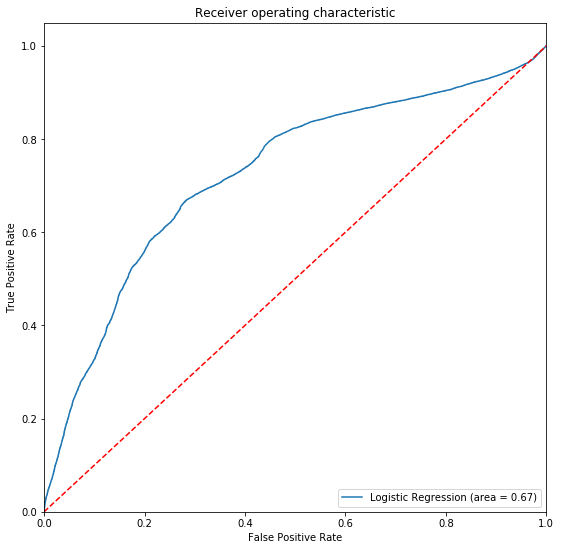

In [41]:
fpr, tpr, thresholds = roc_curve(y_validate, logreg.predict_proba(x_validate)[:,1])
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

Fitting model on train data

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predicting using the model on test data

In [44]:
y_pred_rf=clf.predict(x_validate)

In [54]:
y_pred_rf

array([0, 1, 1, ..., 0, 1, 1])

In [46]:
print("Accuracy of Random Forest classifier on test set:",metrics.accuracy_score(y_validate,y_pred_rf))

Accuracy of Random Forest classifier on test set: 0.6559913343824726


Confusion matrix

In [59]:
type(y_validate)

pandas.core.series.Series

In [60]:
type(y_pred_rf)

numpy.ndarray

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_validate,y_pred_rf)
print(confusion_matrix_rf)

[[15758  8589]
 [ 8243 16339]]


Precision, Recall, F-measure and Support

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred_rf))

             precision    recall  f1-score   support

          0       0.66      0.65      0.65     24347
          1       0.66      0.66      0.66     24582

avg / total       0.66      0.66      0.66     48929



AUC and ROC curve

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_rf = roc_auc_score(y_validate,clf.predict(x_validate))
logit_roc_auc_rf

0.6559494345405898

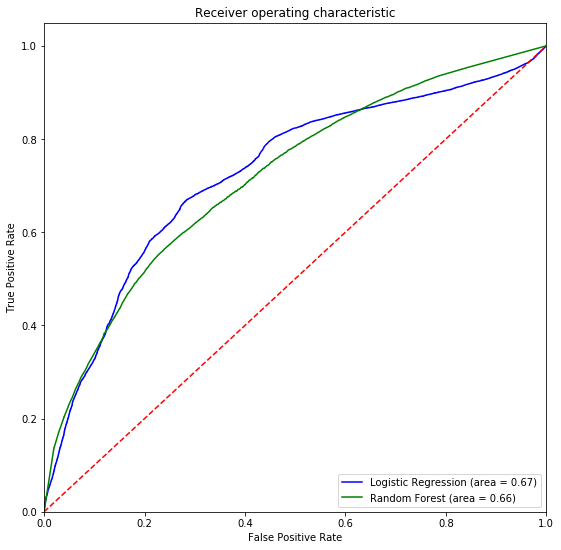

In [69]:
fpr, tpr, thresholds = roc_curve(y_validate,logreg.predict_proba(x_validate)[:,1])
fpr_rf,tpr_rf, thresholds_rf = roc_curve(y_validate,clf.predict_proba(x_validate)[:,1])
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_rf, tpr_rf, 'g' ,label='Random Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Checking feature importance using Random Forest

In [70]:
x_validate.columns

Index(['rev_id_1', 'rev_id_2', 'rev_id_3', 'rev_id_4', 'rev_id_5', 'rev_id_6',
       'rev_id_7', 'rev_id_8', 'rev_len_1', 'rev_len_2', 'rev_len_3',
       'rev_len_4', 'rev_len_5', 'rev_len_6', 'rev_len_7', 'rev_len_8',
       'rev_minor_edit_n_1', 'rev_minor_edit_n_2', 'rev_minor_edit_n_3',
       'rev_minor_edit_n_4', 'rev_minor_edit_n_5', 'rev_minor_edit_n_6',
       'rev_minor_edit_n_7', 'rev_minor_edit_n_8', 'rev_deleted_n_1',
       'rev_deleted_n_2', 'rev_deleted_n_3', 'rev_deleted_n_4',
       'rev_deleted_n_5', 'rev_deleted_n_6', 'rev_deleted_n_7',
       'rev_deleted_n_8', 'days_active'],
      dtype='object')

In [52]:
feature_imp = pd.Series(clf.feature_importances_,index=x_validate.columns).sort_values(ascending=False)
feature_imp

rev_len_1             0.660829
rev_id_1              0.143265
rev_minor_edit_n_1    0.063489
days_active           0.028651
rev_len_2             0.015351
rev_id_2              0.012897
rev_deleted_n_1       0.011683
rev_len_3             0.009758
rev_len_4             0.006479
rev_id_3              0.006102
rev_len_5             0.005834
rev_len_6             0.004645
rev_id_4              0.004438
rev_len_7             0.004064
rev_len_8             0.003978
rev_id_5              0.003595
rev_id_6              0.003116
rev_id_7              0.002969
rev_id_8              0.002664
rev_minor_edit_n_2    0.001473
rev_minor_edit_n_3    0.000991
rev_minor_edit_n_4    0.000814
rev_minor_edit_n_5    0.000670
rev_minor_edit_n_8    0.000591
rev_minor_edit_n_6    0.000551
rev_minor_edit_n_7    0.000547
rev_deleted_n_2       0.000170
rev_deleted_n_3       0.000119
rev_deleted_n_4       0.000082
rev_deleted_n_6       0.000058
rev_deleted_n_5       0.000046
rev_deleted_n_7       0.000046
rev_dele

### Building new Logistic regression and Random Forest models with just the most important features

In [72]:
x_train_imp = x_train[['rev_len_1','rev_id_1','rev_minor_edit_n_1','days_active','rev_len_2','rev_id_2',
                       'rev_deleted_n_1']]
x_train_imp.head()

,rev_len_1,rev_id_1,rev_minor_edit_n_1,days_active,rev_len_2,rev_id_2,rev_deleted_n_1
3426870,31457.5,2.0,0.0,1.0,0.0,0.0,0.0
1717361,89486.0,1.0,0.0,1.0,0.0,0.0,0.0
4261853,16457.0,1.0,0.0,2.0,0.0,0.0,0.0
4846476,28258.0,2.0,0.0,1.0,0.0,0.0,0.0
2177600,118454.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
x_train_imp = x_train[['rev_len_1','rev_id_1','rev_minor_edit_n_1','days_active','rev_len_2','rev_id_2',
                       'rev_deleted_n_1']]
x_train_imp.head()

In [73]:
x_validate_imp = x_validate[['rev_len_1','rev_id_1','rev_minor_edit_n_1','days_active','rev_len_2','rev_id_2',
                       'rev_deleted_n_1']]
x_validate_imp.head()

,rev_len_1,rev_id_1,rev_minor_edit_n_1,days_active,rev_len_2,rev_id_2,rev_deleted_n_1
4803210,5666.000000,1.0,0.0,1.0,0.0,0.0,0.0
4933539,15561.000000,1.0,1.0,1.0,0.0,0.0,0.0
2822610,15900.279412,68.0,0.0,3.0,0.0,0.0,0.0
1236623,49494.000000,1.0,0.0,1.0,0.0,0.0,0.0
5899573,1494.500000,2.0,0.5,1.0,0.0,0.0,0.0


#### New Logistic Regression model

In [74]:
logreg_new = LogisticRegression()
logreg_new.fit(x_train_imp,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
y_pred_lr_new = logreg_new.predict(x_validate_imp)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_new.score(x_validate_imp,
                                                                                               y_validate)))

Accuracy of logistic regression classifier on test set: 0.66


In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_validate,y_pred_lr_new)
print(confusion_matrix)

[[20458  3889]
 [12632 11950]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred_lr_new))

             precision    recall  f1-score   support

          0       0.62      0.84      0.71     24347
          1       0.75      0.49      0.59     24582

avg / total       0.69      0.66      0.65     48929



In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_validate,logreg_new.predict(x_validate_imp))
logit_roc_auc

0.6631979279915801

Overall performance is same or slightly worse for Logistic regression with these features

#### New Random Forest model

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf_new=RandomForestClassifier(n_estimators=100)
clf_new.fit(x_train_imp,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
y_pred_rf_new=clf_new.predict(x_validate_imp)
print("Accuracy of Random Forest classifier on test set:",metrics.accuracy_score(y_validate,y_pred_rf_new))

Accuracy of Random Forest classifier on test set: 0.6536818655603016


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_validate,y_pred_rf_new)
print(confusion_matrix_rf)

[[15775  8572]
 [ 8373 16209]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred_rf_new))

             precision    recall  f1-score   support

          0       0.65      0.65      0.65     24347
          1       0.65      0.66      0.66     24582

avg / total       0.65      0.65      0.65     48929



In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_rf = roc_auc_score(y_validate,clf_new.predict(x_validate_imp))
logit_roc_auc_rf

0.6536543423171

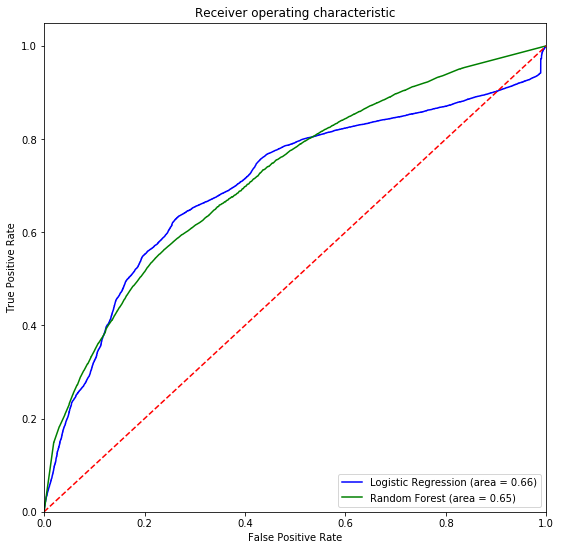

In [88]:
fpr, tpr, thresholds = roc_curve(y_validate,logreg_new.predict_proba(x_validate_imp)[:,1])
fpr_rf,tpr_rf, thresholds_rf = roc_curve(y_validate,clf_new.predict_proba(x_validate_imp)[:,1])
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_rf, tpr_rf, 'g' ,label='Random Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Overall performance seems worse for both models for training data, but prediction power may have gone up.